# Linear regression

### Let's define the function!

\\( y = ax + b \\)

<IPython.core.display.Javascript object>


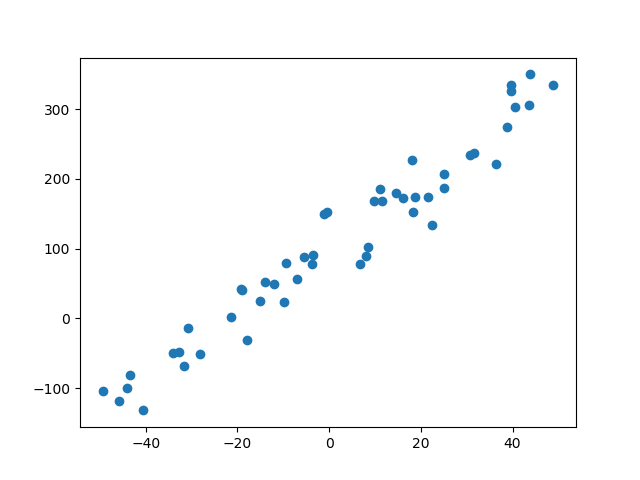

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

# Noise mean and standart deviation
mu, sigma = 0, 40

# Range of input values
range_min = -50
range_max = 50

# Number of examples to use for training
samples = 50

# The "ground-truth" function
slope = 5
bias = 100
f = lambda slope, bias, x: slope*x + bias

# Input values
x = np.random.uniform(range_min, range_max, samples)

# Output values with added noise
y = f(slope, bias, x) + np.random.normal(mu, sigma, samples)

#for in_out in zip(x, y):
#    print("X :{0:.2f} \tY:{1:.2f}".format(in_out[0], in_out[1]))

fig1, ax1 = plt.subplots()
ax1.scatter(x,y)
fig1.show()

---------------------------------------------------------------------------------

### Define the single-neuron network without non-linerity

In [2]:
import keras
from keras.layers import Input, Dense
from keras.models import Model

inputs = Input(shape=(1,))
preds = Dense(1,activation='linear')(inputs)
model = Model(inputs=inputs,outputs=preds)
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


---------------------------------------------------------------------------------

### Set training settings and callbacks

In [3]:
# Print the batch number at the beginning of every batch.
weight_log = []
weight_log_callback = keras.callbacks.LambdaCallback(on_epoch_end=lambda batch,logs: weight_log.append([model.layers[1].get_weights()[0][0][0], model.layers[1].get_weights()[1][0]]))

# Define optimization algorithm
sgd = keras.optimizers.SGD(lr=0.0000001)
adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=adam ,loss='mse')

---------------------------------------------------------------------------------

### Start training

In [4]:
# Start training
model.fit(x,y, batch_size=1, epochs=3000, shuffle=False, callbacks=[weight_log_callback])

Epoch 1/3000
50/50 [==============================] - 2s 42ms/step - loss: 34538.2550
Epoch 2/3000
50/50 [==============================] - 0s 2ms/step - loss: 34273.5829
Epoch 3/3000
50/50 [==============================] - 0s 2ms/step - loss: 34006.0496
Epoch 4/3000
50/50 [==============================] - 0s 2ms/step - loss: 33739.3021
Epoch 5/3000
50/50 [==============================] - 0s 2ms/step - loss: 33474.1592
Epoch 6/3000
50/50 [==============================] - 0s 2ms/step - loss: 33210.9074
Epoch 7/3000
50/50 [==============================] - 0s 2ms/step - loss: 32949.6831
Epoch 8/3000
50/50 [==============================] - 0s 2ms/step - loss: 32690.5499
Epoch 9/3000
50/50 [==============================] - 0s 2ms/step - loss: 32433.5387
Epoch 10/3000
50/50 [==============================] - 0s 2ms/step - loss: 32178.6634
Epoch 11/3000
50/50 [==============================] - 0s 2ms/step - loss: 31925.9269
Epoch 12/3000
50/50 [==============================] - 0s 2ms/

50/50 [==============================] - 0s 2ms/step - loss: 16944.3363
Epoch 97/3000
50/50 [==============================] - 0s 2ms/step - loss: 16831.3566
Epoch 98/3000
50/50 [==============================] - 0s 2ms/step - loss: 16719.6077
Epoch 99/3000
50/50 [==============================] - 0s 2ms/step - loss: 16609.0802
Epoch 100/3000
50/50 [==============================] - 0s 2ms/step - loss: 16499.7680
Epoch 101/3000
50/50 [==============================] - 0s 2ms/step - loss: 16391.6639
Epoch 102/3000
50/50 [==============================] - 0s 2ms/step - loss: 16284.7604
Epoch 103/3000
50/50 [==============================] - 0s 2ms/step - loss: 16179.0489
Epoch 104/3000
50/50 [==============================] - 0s 2ms/step - loss: 16074.5219
Epoch 105/3000
50/50 [==============================] - 0s 2ms/step - loss: 15971.1712
Epoch 106/3000
50/50 [==============================] - 0s 2ms/step - loss: 15868.9948
Epoch 107/3000
50/50 [==============================] - 0s 2m

50/50 [==============================] - 0s 2ms/step - loss: 10658.0586
Epoch 191/3000
50/50 [==============================] - 0s 2ms/step - loss: 10626.1761
Epoch 192/3000
50/50 [==============================] - 0s 2ms/step - loss: 10594.7700
Epoch 193/3000
50/50 [==============================] - 0s 2ms/step - loss: 10563.8323
Epoch 194/3000
50/50 [==============================] - 0s 2ms/step - loss: 10533.3570
Epoch 195/3000
50/50 [==============================] - 0s 2ms/step - loss: 10503.3347
Epoch 196/3000
50/50 [==============================] - 0s 2ms/step - loss: 10473.7611
Epoch 197/3000
50/50 [==============================] - 0s 2ms/step - loss: 10444.6257
Epoch 198/3000
50/50 [==============================] - 0s 2ms/step - loss: 10415.9243
Epoch 199/3000
50/50 [==============================] - 0s 2ms/step - loss: 10387.6473
Epoch 200/3000
50/50 [==============================] - 0s 2ms/step - loss: 10359.7872
Epoch 201/3000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 8934.1293
Epoch 286/3000
50/50 [==============================] - 0s 2ms/step - loss: 8923.4743
Epoch 287/3000
50/50 [==============================] - 0s 2ms/step - loss: 8912.8860
Epoch 288/3000
50/50 [==============================] - 0s 2ms/step - loss: 8902.3623
Epoch 289/3000
50/50 [==============================] - 0s 2ms/step - loss: 8891.9016
Epoch 290/3000
50/50 [==============================] - 0s 2ms/step - loss: 8881.5030
Epoch 291/3000
50/50 [==============================] - 0s 2ms/step - loss: 8871.1636
Epoch 292/3000
50/50 [==============================] - 0s 2ms/step - loss: 8860.8822
Epoch 293/3000
50/50 [==============================] - 0s 2ms/step - loss: 8850.6588
Epoch 294/3000
50/50 [==============================] - 0s 2ms/step - loss: 8840.4908
Epoch 295/3000
50/50 [==============================] - 0s 2ms/step - loss: 8830.3781
Epoch 296/3000
50/50 [==============================] - 0s 2ms/step -

50/50 [==============================] - 0s 2ms/step - loss: 8084.2786
Epoch 381/3000
50/50 [==============================] - 0s 2ms/step - loss: 8076.2367
Epoch 382/3000
50/50 [==============================] - 0s 2ms/step - loss: 8068.2040
Epoch 383/3000
50/50 [==============================] - 0s 2ms/step - loss: 8060.1819
Epoch 384/3000
50/50 [==============================] - 0s 2ms/step - loss: 8052.1677
Epoch 385/3000
50/50 [==============================] - 0s 2ms/step - loss: 8044.1635
Epoch 386/3000
50/50 [==============================] - 0s 2ms/step - loss: 8036.1682
Epoch 387/3000
50/50 [==============================] - 0s 2ms/step - loss: 8028.1809
Epoch 388/3000
50/50 [==============================] - 0s 2ms/step - loss: 8020.2030
Epoch 389/3000
50/50 [==============================] - 0s 2ms/step - loss: 8012.2339
Epoch 390/3000
50/50 [==============================] - 0s 2ms/step - loss: 8004.2743
Epoch 391/3000
50/50 [==============================] - 0s 2ms/step -

50/50 [==============================] - 0s 2ms/step - loss: 7352.0749
Epoch 476/3000
50/50 [==============================] - 0s 2ms/step - loss: 7344.6444
Epoch 477/3000
50/50 [==============================] - 0s 2ms/step - loss: 7337.2195
Epoch 478/3000
50/50 [==============================] - 0s 2ms/step - loss: 7329.8005
Epoch 479/3000
50/50 [==============================] - 0s 2ms/step - loss: 7322.3871
Epoch 480/3000
50/50 [==============================] - 0s 2ms/step - loss: 7314.9776
Epoch 481/3000
50/50 [==============================] - 0s 2ms/step - loss: 7307.5732
Epoch 482/3000
50/50 [==============================] - 0s 2ms/step - loss: 7300.1741
Epoch 483/3000
50/50 [==============================] - 0s 2ms/step - loss: 7292.7803
Epoch 484/3000
50/50 [==============================] - 0s 2ms/step - loss: 7285.3926
Epoch 485/3000
50/50 [==============================] - 0s 2ms/step - loss: 7278.0094
Epoch 486/3000
50/50 [==============================] - 0s 2ms/step -

50/50 [==============================] - 0s 2ms/step - loss: 6668.3687
Epoch 571/3000
50/50 [==============================] - 0s 2ms/step - loss: 6661.4045
Epoch 572/3000
50/50 [==============================] - 0s 2ms/step - loss: 6654.4459
Epoch 573/3000
50/50 [==============================] - 0s 2ms/step - loss: 6647.4912
Epoch 574/3000
50/50 [==============================] - 0s 2ms/step - loss: 6640.5419
Epoch 575/3000
50/50 [==============================] - 0s 2ms/step - loss: 6633.5967
Epoch 576/3000
50/50 [==============================] - 0s 2ms/step - loss: 6626.6567
Epoch 577/3000
50/50 [==============================] - 0s 2ms/step - loss: 6619.7223
Epoch 578/3000
50/50 [==============================] - 0s 2ms/step - loss: 6612.7918
Epoch 579/3000
50/50 [==============================] - 0s 2ms/step - loss: 6605.8660
Epoch 580/3000
50/50 [==============================] - 0s 2ms/step - loss: 6598.9452
Epoch 581/3000
50/50 [==============================] - 0s 2ms/step -

50/50 [==============================] - 0s 2ms/step - loss: 6028.2057
Epoch 666/3000
50/50 [==============================] - 0s 2ms/step - loss: 6021.6961
Epoch 667/3000
50/50 [==============================] - 0s 2ms/step - loss: 6015.1924
Epoch 668/3000
50/50 [==============================] - 0s 2ms/step - loss: 6008.6933
Epoch 669/3000
50/50 [==============================] - 0s 2ms/step - loss: 6002.1995
Epoch 670/3000
50/50 [==============================] - 0s 2ms/step - loss: 5995.7105
Epoch 671/3000
50/50 [==============================] - 0s 2ms/step - loss: 5989.2259
Epoch 672/3000
50/50 [==============================] - 0s 2ms/step - loss: 5982.7458
Epoch 673/3000
50/50 [==============================] - 0s 2ms/step - loss: 5976.2709
Epoch 674/3000
50/50 [==============================] - 0s 2ms/step - loss: 5969.8005
Epoch 675/3000
50/50 [==============================] - 0s 2ms/step - loss: 5963.3345
Epoch 676/3000
50/50 [==============================] - 0s 2ms/step -

50/50 [==============================] - 0s 2ms/step - loss: 5431.1226
Epoch 761/3000
50/50 [==============================] - 0s 2ms/step - loss: 5425.0655
Epoch 762/3000
50/50 [==============================] - 0s 2ms/step - loss: 5419.0133
Epoch 763/3000
50/50 [==============================] - 0s 2ms/step - loss: 5412.9659
Epoch 764/3000
50/50 [==============================] - 0s 2ms/step - loss: 5406.9225
Epoch 765/3000
50/50 [==============================] - 0s 2ms/step - loss: 5400.8833
Epoch 766/3000
50/50 [==============================] - 0s 2ms/step - loss: 5394.8485
Epoch 767/3000
50/50 [==============================] - 0s 2ms/step - loss: 5388.8181
Epoch 768/3000
50/50 [==============================] - 0s 2ms/step - loss: 5382.7928
Epoch 769/3000
50/50 [==============================] - 0s 2ms/step - loss: 5376.7724
Epoch 770/3000
50/50 [==============================] - 0s 2ms/step - loss: 5370.7570
Epoch 771/3000
50/50 [==============================] - 0s 2ms/step -

50/50 [==============================] - 0s 2ms/step - loss: 4876.7661
Epoch 856/3000
50/50 [==============================] - 0s 2ms/step - loss: 4871.1574
Epoch 857/3000
50/50 [==============================] - 0s 2ms/step - loss: 4865.5537
Epoch 858/3000
50/50 [==============================] - 0s 2ms/step - loss: 4859.9545
Epoch 859/3000
50/50 [==============================] - 0s 2ms/step - loss: 4854.3610
Epoch 860/3000
50/50 [==============================] - 0s 2ms/step - loss: 4848.7722
Epoch 861/3000
50/50 [==============================] - 0s 2ms/step - loss: 4843.1881
Epoch 862/3000
50/50 [==============================] - 0s 2ms/step - loss: 4837.6083
Epoch 863/3000
50/50 [==============================] - 0s 2ms/step - loss: 4832.0327
Epoch 864/3000
50/50 [==============================] - 0s 2ms/step - loss: 4826.4614
Epoch 865/3000
50/50 [==============================] - 0s 2ms/step - loss: 4820.8948
Epoch 866/3000
50/50 [==============================] - 0s 2ms/step -

50/50 [==============================] - 0s 2ms/step - loss: 4364.8466
Epoch 951/3000
50/50 [==============================] - 0s 2ms/step - loss: 4359.6824
Epoch 952/3000
50/50 [==============================] - 0s 2ms/step - loss: 4354.5220
Epoch 953/3000
50/50 [==============================] - 0s 2ms/step - loss: 4349.3657
Epoch 954/3000
50/50 [==============================] - 0s 2ms/step - loss: 4344.2142
Epoch 955/3000
50/50 [==============================] - 0s 2ms/step - loss: 4339.0663
Epoch 956/3000
50/50 [==============================] - 0s 2ms/step - loss: 4333.9244
Epoch 957/3000
50/50 [==============================] - 0s 2ms/step - loss: 4328.7867
Epoch 958/3000
50/50 [==============================] - 0s 2ms/step - loss: 4323.6544
Epoch 959/3000
50/50 [==============================] - 0s 2ms/step - loss: 4318.5271
Epoch 960/3000
50/50 [==============================] - 0s 2ms/step - loss: 4313.4044
Epoch 961/3000
50/50 [==============================] - 0s 2ms/step -

50/50 [==============================] - 0s 2ms/step - loss: 3899.6474
Epoch 1045/3000
50/50 [==============================] - 0s 2ms/step - loss: 3894.9186
Epoch 1046/3000
50/50 [==============================] - 0s 2ms/step - loss: 3890.1934
Epoch 1047/3000
50/50 [==============================] - 0s 2ms/step - loss: 3885.4735
Epoch 1048/3000
50/50 [==============================] - 0s 2ms/step - loss: 3880.7569
Epoch 1049/3000
50/50 [==============================] - 0s 2ms/step - loss: 3876.0450
Epoch 1050/3000
50/50 [==============================] - 0s 2ms/step - loss: 3871.3383
Epoch 1051/3000
50/50 [==============================] - 0s 2ms/step - loss: 3866.6353
Epoch 1052/3000
50/50 [==============================] - 0s 2ms/step - loss: 3861.9366
Epoch 1053/3000
50/50 [==============================] - 0s 2ms/step - loss: 3857.2429
Epoch 1054/3000
50/50 [==============================] - 0s 2ms/step - loss: 3852.5534
Epoch 1055/3000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 3475.0508
Epoch 1139/3000
50/50 [==============================] - 0s 2ms/step - loss: 3470.7501
Epoch 1140/3000
50/50 [==============================] - 0s 2ms/step - loss: 3466.4535
Epoch 1141/3000
50/50 [==============================] - 0s 2ms/step - loss: 3462.1627
Epoch 1142/3000
50/50 [==============================] - 0s 2ms/step - loss: 3457.8775
Epoch 1143/3000
50/50 [==============================] - 0s 2ms/step - loss: 3453.5961
Epoch 1144/3000
50/50 [==============================] - 0s 2ms/step - loss: 3449.3197
Epoch 1145/3000
50/50 [==============================] - 0s 2ms/step - loss: 3445.0470
Epoch 1146/3000
50/50 [==============================] - 0s 2ms/step - loss: 3440.7789
Epoch 1147/3000
50/50 [==============================] - 0s 2ms/step - loss: 3436.5154
Epoch 1148/3000
50/50 [==============================] - 0s 2ms/step - loss: 3432.2549
Epoch 1149/3000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 3090.4260
Epoch 1233/3000
50/50 [==============================] - 0s 2ms/step - loss: 3086.5462
Epoch 1234/3000
50/50 [==============================] - 0s 2ms/step - loss: 3082.6700
Epoch 1235/3000
50/50 [==============================] - 0s 2ms/step - loss: 3078.7978
Epoch 1236/3000
50/50 [==============================] - 0s 2ms/step - loss: 3074.9306
Epoch 1237/3000
50/50 [==============================] - 0s 2ms/step - loss: 3071.0679
Epoch 1238/3000
50/50 [==============================] - 0s 2ms/step - loss: 3067.2105
Epoch 1239/3000
50/50 [==============================] - 0s 2ms/step - loss: 3063.3576
Epoch 1240/3000
50/50 [==============================] - 0s 2ms/step - loss: 3059.5096
Epoch 1241/3000
50/50 [==============================] - 0s 2ms/step - loss: 3055.6670
Epoch 1242/3000
50/50 [==============================] - 0s 2ms/step - loss: 3051.8279
Epoch 1243/3000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 2744.9540
Epoch 1327/3000
50/50 [==============================] - 0s 2ms/step - loss: 2741.4863
Epoch 1328/3000
50/50 [==============================] - 0s 2ms/step - loss: 2738.0226
Epoch 1329/3000
50/50 [==============================] - 0s 2ms/step - loss: 2734.5621
Epoch 1330/3000
50/50 [==============================] - 0s 2ms/step - loss: 2731.1062
Epoch 1331/3000
50/50 [==============================] - 0s 2ms/step - loss: 2727.6542
Epoch 1332/3000
50/50 [==============================] - 0s 2ms/step - loss: 2724.2063
Epoch 1333/3000
50/50 [==============================] - 0s 2ms/step - loss: 2720.7633
Epoch 1334/3000
50/50 [==============================] - 0s 2ms/step - loss: 2717.3248
Epoch 1335/3000
50/50 [==============================] - 0s 2ms/step - loss: 2713.8909
Epoch 1336/3000
50/50 [==============================] - 0s 2ms/step - loss: 2710.4627
Epoch 1337/3000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 2437.6281
Epoch 1421/3000
50/50 [==============================] - 0s 2ms/step - loss: 2434.5602
Epoch 1422/3000
50/50 [==============================] - 0s 2ms/step - loss: 2431.4963
Epoch 1423/3000
50/50 [==============================] - 0s 2ms/step - loss: 2428.4356
Epoch 1424/3000
50/50 [==============================] - 0s 2ms/step - loss: 2425.3794
Epoch 1425/3000
50/50 [==============================] - 0s 2ms/step - loss: 2422.3265
Epoch 1426/3000
50/50 [==============================] - 0s 2ms/step - loss: 2419.2784
Epoch 1427/3000
50/50 [==============================] - 0s 2ms/step - loss: 2416.2340
Epoch 1428/3000
50/50 [==============================] - 0s 2ms/step - loss: 2413.1945
Epoch 1429/3000
50/50 [==============================] - 0s 2ms/step - loss: 2410.1596
Epoch 1430/3000
50/50 [==============================] - 0s 2ms/step - loss: 2407.1290
Epoch 1431/3000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 2167.1901
Epoch 1515/3000
50/50 [==============================] - 0s 2ms/step - loss: 2164.5048
Epoch 1516/3000
50/50 [==============================] - 0s 2ms/step - loss: 2161.8241
Epoch 1517/3000
50/50 [==============================] - 0s 2ms/step - loss: 2159.1483
Epoch 1518/3000
50/50 [==============================] - 0s 2ms/step - loss: 2156.4770
Epoch 1519/3000
50/50 [==============================] - 0s 2ms/step - loss: 2153.8091
Epoch 1520/3000
50/50 [==============================] - 0s 2ms/step - loss: 2151.1454
Epoch 1521/3000
50/50 [==============================] - 0s 2ms/step - loss: 2148.4859
Epoch 1522/3000
50/50 [==============================] - 0s 2ms/step - loss: 2145.8289
Epoch 1523/3000
50/50 [==============================] - 0s 2ms/step - loss: 2143.1753
Epoch 1524/3000
50/50 [==============================] - 0s 2ms/step - loss: 2140.5257
Epoch 1525/3000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 1932.0760
Epoch 1609/3000
50/50 [==============================] - 0s 2ms/step - loss: 1929.7579
Epoch 1610/3000
50/50 [==============================] - 0s 2ms/step - loss: 1927.4431
Epoch 1611/3000
50/50 [==============================] - 0s 2ms/step - loss: 1925.1328
Epoch 1612/3000
50/50 [==============================] - 0s 2ms/step - loss: 1922.8252
Epoch 1613/3000
50/50 [==============================] - 0s 2ms/step - loss: 1920.5207
Epoch 1614/3000
50/50 [==============================] - 0s 2ms/step - loss: 1918.2205
Epoch 1615/3000
50/50 [==============================] - 0s 2ms/step - loss: 1915.9259
Epoch 1616/3000
50/50 [==============================] - 0s 2ms/step - loss: 1913.6360
Epoch 1617/3000
50/50 [==============================] - 0s 2ms/step - loss: 1911.3498
Epoch 1618/3000
50/50 [==============================] - 0s 2ms/step - loss: 1909.0667
Epoch 1619/3000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 1730.3934
Epoch 1703/3000
50/50 [==============================] - 0s 2ms/step - loss: 1728.4206
Epoch 1704/3000
50/50 [==============================] - 0s 2ms/step - loss: 1726.4517
Epoch 1705/3000
50/50 [==============================] - 0s 2ms/step - loss: 1724.4856
Epoch 1706/3000
50/50 [==============================] - 0s 2ms/step - loss: 1722.5225
Epoch 1707/3000
50/50 [==============================] - 0s 2ms/step - loss: 1720.5632
Epoch 1708/3000
50/50 [==============================] - 0s 2ms/step - loss: 1718.6060
Epoch 1709/3000
50/50 [==============================] - 0s 2ms/step - loss: 1716.6523
Epoch 1710/3000
50/50 [==============================] - 0s 2ms/step - loss: 1714.7016
Epoch 1711/3000
50/50 [==============================] - 0s 2ms/step - loss: 1712.7543
Epoch 1712/3000
50/50 [==============================] - 0s 2ms/step - loss: 1710.8104
Epoch 1713/3000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 1559.8850
Epoch 1797/3000
50/50 [==============================] - 0s 2ms/step - loss: 1558.2301
Epoch 1798/3000
50/50 [==============================] - 0s 2ms/step - loss: 1556.5784
Epoch 1799/3000
50/50 [==============================] - 0s 2ms/step - loss: 1554.9298
Epoch 1800/3000
50/50 [==============================] - 0s 2ms/step - loss: 1553.2845
Epoch 1801/3000
50/50 [==============================] - 0s 2ms/step - loss: 1551.6421
Epoch 1802/3000
50/50 [==============================] - 0s 2ms/step - loss: 1550.0021
Epoch 1803/3000
50/50 [==============================] - 0s 2ms/step - loss: 1548.3655
Epoch 1804/3000
50/50 [==============================] - 0s 2ms/step - loss: 1546.7324
Epoch 1805/3000
50/50 [==============================] - 0s 2ms/step - loss: 1545.1028
Epoch 1806/3000
50/50 [==============================] - 0s 2ms/step - loss: 1543.4767
Epoch 1807/3000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 1417.9542
Epoch 1891/3000
50/50 [==============================] - 0s 2ms/step - loss: 1416.5881
Epoch 1892/3000
50/50 [==============================] - 0s 2ms/step - loss: 1415.2242
Epoch 1893/3000
50/50 [==============================] - 0s 2ms/step - loss: 1413.8624
Epoch 1894/3000
50/50 [==============================] - 0s 2ms/step - loss: 1412.5033
Epoch 1895/3000
50/50 [==============================] - 0s 2ms/step - loss: 1411.1475
Epoch 1896/3000
50/50 [==============================] - 0s 2ms/step - loss: 1409.7953
Epoch 1897/3000
50/50 [==============================] - 0s 2ms/step - loss: 1408.4458
Epoch 1898/3000
50/50 [==============================] - 0s 2ms/step - loss: 1407.0994
Epoch 1899/3000
50/50 [==============================] - 0s 2ms/step - loss: 1405.7563
Epoch 1900/3000
50/50 [==============================] - 0s 2ms/step - loss: 1404.4159
Epoch 1901/3000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 1301.6837
Epoch 1985/3000
50/50 [==============================] - 0s 2ms/step - loss: 1300.5737
Epoch 1986/3000
50/50 [==============================] - 0s 2ms/step - loss: 1299.4664
Epoch 1987/3000
50/50 [==============================] - 0s 2ms/step - loss: 1298.3615
Epoch 1988/3000
50/50 [==============================] - 0s 2ms/step - loss: 1297.2585
Epoch 1989/3000
50/50 [==============================] - 0s 2ms/step - loss: 1296.1582
Epoch 1990/3000
50/50 [==============================] - 0s 2ms/step - loss: 1295.0605
Epoch 1991/3000
50/50 [==============================] - 0s 2ms/step - loss: 1293.9653
Epoch 1992/3000
50/50 [==============================] - 0s 2ms/step - loss: 1292.8734
Epoch 1993/3000
50/50 [==============================] - 0s 2ms/step - loss: 1291.7843
Epoch 1994/3000
50/50 [==============================] - 0s 2ms/step - loss: 1290.6974
Epoch 1995/3000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 1207.9547
Epoch 2079/3000
50/50 [==============================] - 0s 2ms/step - loss: 1207.0676
Epoch 2080/3000
50/50 [==============================] - 0s 2ms/step - loss: 1206.1828
Epoch 2081/3000
50/50 [==============================] - 0s 2ms/step - loss: 1205.3008
Epoch 2082/3000
50/50 [==============================] - 0s 2ms/step - loss: 1204.4201
Epoch 2083/3000
50/50 [==============================] - 0s 2ms/step - loss: 1203.5406
Epoch 2084/3000
50/50 [==============================] - 0s 2ms/step - loss: 1202.6637
Epoch 2085/3000
50/50 [==============================] - 0s 2ms/step - loss: 1201.7894
Epoch 2086/3000
50/50 [==============================] - 0s 2ms/step - loss: 1200.9167
Epoch 2087/3000
50/50 [==============================] - 0s 2ms/step - loss: 1200.0457
Epoch 2088/3000
50/50 [==============================] - 0s 2ms/step - loss: 1199.1775
Epoch 2089/3000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 1133.5675
Epoch 2173/3000
50/50 [==============================] - 0s 2ms/step - loss: 1132.8682
Epoch 2174/3000
50/50 [==============================] - 0s 2ms/step - loss: 1132.1709
Epoch 2175/3000
50/50 [==============================] - 0s 2ms/step - loss: 1131.4752
Epoch 2176/3000
50/50 [==============================] - 0s 2ms/step - loss: 1130.7819
Epoch 2177/3000
50/50 [==============================] - 0s 2ms/step - loss: 1130.0906
Epoch 2178/3000
50/50 [==============================] - 0s 2ms/step - loss: 1129.4012
Epoch 2179/3000
50/50 [==============================] - 0s 2ms/step - loss: 1128.7140
Epoch 2180/3000
50/50 [==============================] - 0s 2ms/step - loss: 1128.0287
Epoch 2181/3000
50/50 [==============================] - 0s 2ms/step - loss: 1127.3448
Epoch 2182/3000
50/50 [==============================] - 0s 2ms/step - loss: 1126.6622
Epoch 2183/3000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 1075.3783
Epoch 2267/3000
50/50 [==============================] - 0s 2ms/step - loss: 1074.8351
Epoch 2268/3000
50/50 [==============================] - 0s 2ms/step - loss: 1074.2939
Epoch 2269/3000
50/50 [==============================] - 0s 2ms/step - loss: 1073.7538
Epoch 2270/3000
50/50 [==============================] - 0s 2ms/step - loss: 1073.2153
Epoch 2271/3000
50/50 [==============================] - 0s 2ms/step - loss: 1072.6787
Epoch 2272/3000
50/50 [==============================] - 0s 2ms/step - loss: 1072.1432
Epoch 2273/3000
50/50 [==============================] - 0s 2ms/step - loss: 1071.6094
Epoch 2274/3000
50/50 [==============================] - 0s 2ms/step - loss: 1071.0770
Epoch 2275/3000
50/50 [==============================] - 0s 2ms/step - loss: 1070.5465
Epoch 2276/3000
50/50 [==============================] - 0s 2ms/step - loss: 1070.0177
Epoch 2277/3000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 1030.4490
Epoch 2361/3000
50/50 [==============================] - 0s 2ms/step - loss: 1030.0324
Epoch 2362/3000
50/50 [==============================] - 0s 2ms/step - loss: 1029.6174
Epoch 2363/3000
50/50 [==============================] - 0s 2ms/step - loss: 1029.2029
Epoch 2364/3000
50/50 [==============================] - 0s 2ms/step - loss: 1028.7906
Epoch 2365/3000
50/50 [==============================] - 0s 2ms/step - loss: 1028.3790
Epoch 2366/3000
50/50 [==============================] - 0s 2ms/step - loss: 1027.9686
Epoch 2367/3000
50/50 [==============================] - 0s 2ms/step - loss: 1027.5591
Epoch 2368/3000
50/50 [==============================] - 0s 2ms/step - loss: 1027.1512
Epoch 2369/3000
50/50 [==============================] - 0s 2ms/step - loss: 1026.7447
Epoch 2370/3000
50/50 [==============================] - 0s 2ms/step - loss: 1026.3392
Epoch 2371/3000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 2ms/step - loss: 996.1521
Epoch 2455/3000
50/50 [==============================] - 0s 2ms/step - loss: 995.8358
Epoch 2456/3000
50/50 [==============================] - 0s 2ms/step - loss: 995.5202
Epoch 2457/3000
50/50 [==============================] - 0s 2ms/step - loss: 995.2054
Epoch 2458/3000
50/50 [==============================] - 0s 2ms/step - loss: 994.8915
Epoch 2459/3000
50/50 [==============================] - 0s 2ms/step - loss: 994.5785
Epoch 2460/3000
50/50 [==============================] - 0s 2ms/step - loss: 994.2663
Epoch 2461/3000
50/50 [==============================] - 0s 2ms/step - loss: 993.9551
Epoch 2462/3000
50/50 [==============================] - 0s 2ms/step - loss: 993.6457
Epoch 2463/3000
50/50 [==============================] - 0s 2ms/step - loss: 993.3368
Epoch 2464/3000
50/50 [==============================] - 0s 2ms/step - loss: 993.0290
Epoch 2465/3000
50/50 [==============================] - 0s 2ms/step -

50/50 [==============================] - 0s 2ms/step - loss: 969.9768
Epoch 2550/3000
50/50 [==============================] - 0s 2ms/step - loss: 969.7390
Epoch 2551/3000
50/50 [==============================] - 0s 2ms/step - loss: 969.5022
Epoch 2552/3000
50/50 [==============================] - 0s 2ms/step - loss: 969.2659
Epoch 2553/3000
50/50 [==============================] - 0s 2ms/step - loss: 969.0307
Epoch 2554/3000
50/50 [==============================] - 0s 2ms/step - loss: 968.7964
Epoch 2555/3000
50/50 [==============================] - 0s 2ms/step - loss: 968.5624
Epoch 2556/3000
50/50 [==============================] - 0s 2ms/step - loss: 968.3296
Epoch 2557/3000
50/50 [==============================] - 0s 2ms/step - loss: 968.0976
Epoch 2558/3000
50/50 [==============================] - 0s 2ms/step - loss: 967.8660
Epoch 2559/3000
50/50 [==============================] - 0s 2ms/step - loss: 967.6350
Epoch 2560/3000
50/50 [==============================] - 0s 2ms/step -

50/50 [==============================] - 0s 2ms/step - loss: 950.3973
Epoch 2645/3000
50/50 [==============================] - 0s 2ms/step - loss: 950.2205
Epoch 2646/3000
50/50 [==============================] - 0s 2ms/step - loss: 950.0441
Epoch 2647/3000
50/50 [==============================] - 0s 2ms/step - loss: 949.8684
Epoch 2648/3000
50/50 [==============================] - 0s 2ms/step - loss: 949.6928
Epoch 2649/3000
50/50 [==============================] - 0s 2ms/step - loss: 949.5180
Epoch 2650/3000
50/50 [==============================] - 0s 2ms/step - loss: 949.3437
Epoch 2651/3000
50/50 [==============================] - 0s 2ms/step - loss: 949.1697
Epoch 2652/3000
50/50 [==============================] - 0s 2ms/step - loss: 948.9964
Epoch 2653/3000
50/50 [==============================] - 0s 2ms/step - loss: 948.8238
Epoch 2654/3000
50/50 [==============================] - 0s 2ms/step - loss: 948.6515
Epoch 2655/3000
50/50 [==============================] - 0s 2ms/step -

50/50 [==============================] - 0s 2ms/step - loss: 935.8421
Epoch 2740/3000
50/50 [==============================] - 0s 2ms/step - loss: 935.7109
Epoch 2741/3000
50/50 [==============================] - 0s 2ms/step - loss: 935.5802
Epoch 2742/3000
50/50 [==============================] - 0s 2ms/step - loss: 935.4496
Epoch 2743/3000
50/50 [==============================] - 0s 2ms/step - loss: 935.3196
Epoch 2744/3000
50/50 [==============================] - 0s 2ms/step - loss: 935.1903
Epoch 2745/3000
50/50 [==============================] - 0s 2ms/step - loss: 935.0615
Epoch 2746/3000
50/50 [==============================] - 0s 2ms/step - loss: 934.9326
Epoch 2747/3000
50/50 [==============================] - 0s 2ms/step - loss: 934.8043
Epoch 2748/3000
50/50 [==============================] - 0s 2ms/step - loss: 934.6765
Epoch 2749/3000
50/50 [==============================] - 0s 2ms/step - loss: 934.5493
Epoch 2750/3000
50/50 [==============================] - 0s 2ms/step -

50/50 [==============================] - 0s 2ms/step - loss: 925.0766
Epoch 2835/3000
50/50 [==============================] - 0s 2ms/step - loss: 924.9797
Epoch 2836/3000
50/50 [==============================] - 0s 2ms/step - loss: 924.8832
Epoch 2837/3000
50/50 [==============================] - 0s 2ms/step - loss: 924.7870
Epoch 2838/3000
50/50 [==============================] - 0s 2ms/step - loss: 924.6912
Epoch 2839/3000
50/50 [==============================] - 0s 2ms/step - loss: 924.5957
Epoch 2840/3000
50/50 [==============================] - 0s 2ms/step - loss: 924.5004
Epoch 2841/3000
50/50 [==============================] - 0s 2ms/step - loss: 924.4054
Epoch 2842/3000
50/50 [==============================] - 0s 2ms/step - loss: 924.3104
Epoch 2843/3000
50/50 [==============================] - 0s 2ms/step - loss: 924.2158
Epoch 2844/3000
50/50 [==============================] - 0s 2ms/step - loss: 924.1214
Epoch 2845/3000
50/50 [==============================] - 0s 2ms/step -

50/50 [==============================] - 0s 2ms/step - loss: 917.1423
Epoch 2930/3000
50/50 [==============================] - 0s 2ms/step - loss: 917.0711
Epoch 2931/3000
50/50 [==============================] - 0s 2ms/step - loss: 917.0002
Epoch 2932/3000
50/50 [==============================] - 0s 2ms/step - loss: 916.9292
Epoch 2933/3000
50/50 [==============================] - 0s 2ms/step - loss: 916.8586
Epoch 2934/3000
50/50 [==============================] - 0s 2ms/step - loss: 916.7883
Epoch 2935/3000
50/50 [==============================] - 0s 2ms/step - loss: 916.7179
Epoch 2936/3000
50/50 [==============================] - 0s 2ms/step - loss: 916.6483
Epoch 2937/3000
50/50 [==============================] - 0s 2ms/step - loss: 916.5786
Epoch 2938/3000
50/50 [==============================] - 0s 2ms/step - loss: 916.5094
Epoch 2939/3000
50/50 [==============================] - 0s 2ms/step - loss: 916.4402
Epoch 2940/3000
50/50 [==============================] - 0s 2ms/step -

-----------------------------------------------------------------------------------------------------------------------------

### Animate training 

<IPython.core.display.Javascript object>


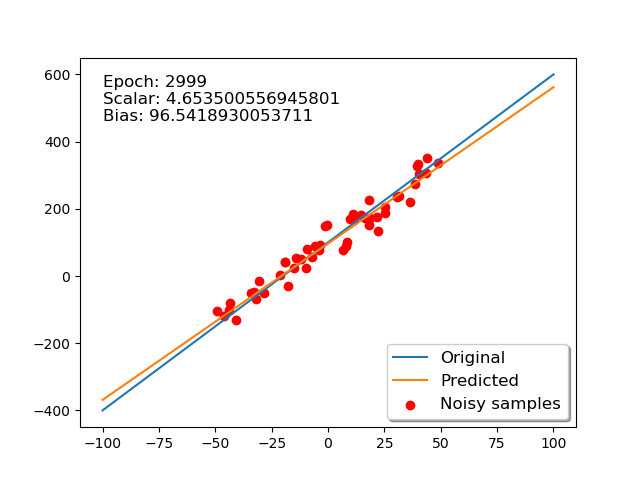

In [8]:
test_input = np.linspace(range_min*2, range_max*2)
weights = model.layers[1].get_weights()
tmp_model = model

import matplotlib.animation

fig2, ax2 = plt.subplots()
ax2.scatter(x,y, c='r', label='Noisy samples')
ax2.plot(test_input, f(slope, bias, test_input), label='Original')
data, = ax2.plot([], [], label='Predicted')
text = ax2.text(range_min*2, f(slope, bias, range_max*2)-140, '', fontsize='large')
ax2.legend(loc='lower right', shadow=True, fontsize='large')

def animate(frame, data, weight_log, text):
    weights[0][0] = weight_log[frame][0]
    weights[1][0] = weight_log[frame][1]
    tmp_model.layers[1].set_weights(weights)
    data.set_data(test_input, tmp_model.predict(test_input))
    text.set_text("Epoch: {}\nScalar: {}\nBias: {}".format(frame, weight_log[frame][0], weight_log[frame][1]))
    return data, text,
    
ani = matplotlib.animation.FuncAnimation(fig2, animate, frames=len(weight_log), fargs=(data, weight_log, text), interval=20, repeat=False, blit=True)
fig2.show()

-----------------------------------------------------------------------------------------------------------------------------

### Plot slope and bias during training

<IPython.core.display.Javascript object>


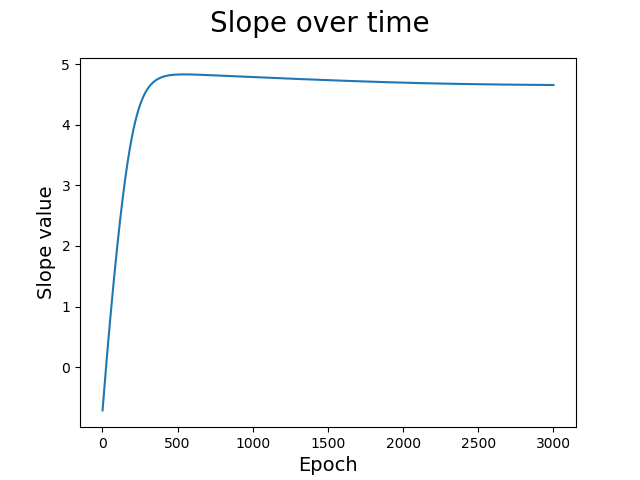

<IPython.core.display.Javascript object>


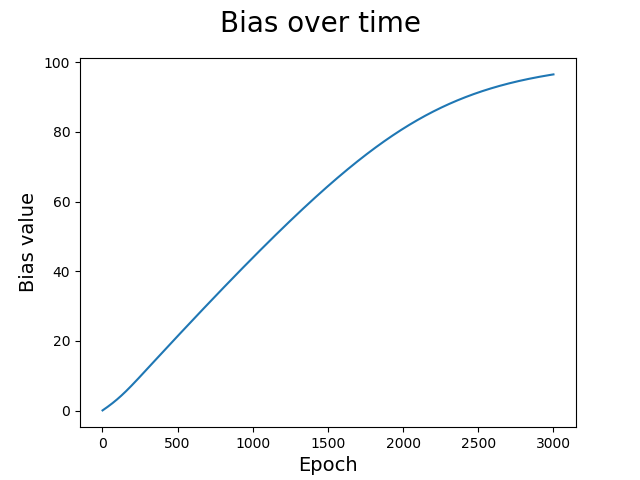

In [6]:
fig3, ax3 = plt.subplots()
a = np.array(weight_log)
epochs = a.shape[0]
ax3.plot(np.linspace(1,epochs,epochs), a[:,0])
fig3.suptitle('Slope over time', fontsize=20)
ax3.set_xlabel('Epoch', fontsize=14)
ax3.set_ylabel('Slope value', fontsize=14)
fig3.show()

fig4, ax4 = plt.subplots()
a = np.array(weight_log)
epochs = a.shape[0]
ax4.plot(np.linspace(1,epochs,epochs), a[:,1])
fig4.suptitle('Bias over time', fontsize=20)
ax4.set_xlabel('Epoch', fontsize=14)
ax4.set_ylabel('Bias value', fontsize=14)
fig4.show()

-----------------------------------------------------------------------------------------------------------------------------

### Calculate and visualize cost function for given function

<IPython.core.display.Javascript object>


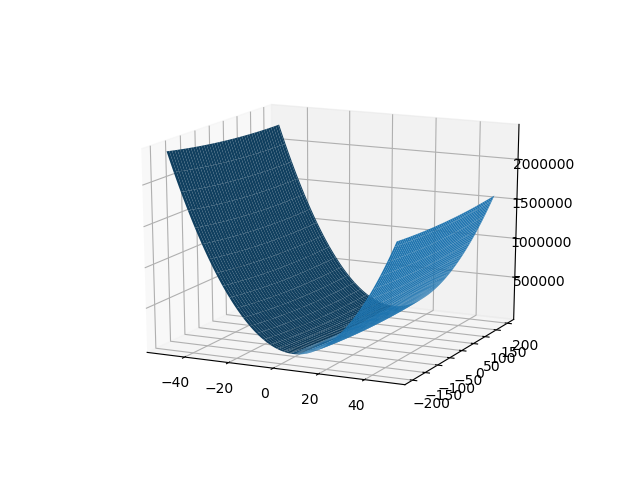

In [7]:
from sklearn.metrics import mean_squared_error

slope_points = 101
bias_points = 401
loss = np.zeros((bias_points, slope_points), dtype='float32')
s = np.linspace(-50, 50, slope_points)
b = np.linspace(-200, 200, bias_points)
for i, sl in enumerate(s):
    for j, bs in enumerate(b):
        weights[0][0] = sl
        weights[1][0] = bs
        tmp_model.layers[1].set_weights(weights)
        loss[j,i] = mean_squared_error(y, tmp_model.predict(x))

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

S, B = np.meshgrid(s, b)
ax.plot_surface(S, B, loss)

plt.show()